<a href="https://colab.research.google.com/github/sezinbiner/find_path_genetic_algorithms/blob/main/4_drone_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import copy
import numpy as np
import random
import math

moves=[[-1,0], [-1,-1], [0, -1], [1,-1], [1,0], [1, 1], [0, 1], [-1, 1]]
directions = [1,2,3,4,5,6,7,8];

def find_cost(old_move, new_move):
  
  if abs(old_move - new_move) == 1 or abs(old_move - new_move) == 7:
    return 1
  elif abs(old_move - new_move) == 2 or abs(old_move - new_move) == 6:
    return 2
  elif abs(old_move - new_move) == 3 or abs(old_move - new_move) == 5:
   return 3
  elif abs(old_move - new_move) == 0:
    return 0
  else:
    return 4

def find_way(end):
  if end[0] == 0 and end[1] == 0:
    return random.randint(5,7)
  elif end[0] == 8 and end[1] == 8:
    return random.randint(1,3)
  elif end[0] == 8 and end[1] == 0:
    return random.choice([1,7,8])
  elif end[0] == 0 and end[1] == 8:
    return random.randint(3,5)
  elif end[0] == 8:
    return random.choice([3,2,1,7,8])
  elif end[0] == 0:
    return random.choice([3,4,5,6,7])
  elif end[1] == 8:
    return random.choice([1,2,3,4,5])
  elif end[1] == 0:
    return random.choice([5,6,7,8,1])
  else:
    return random.randint(1,8)

def group4(routes,numberOfDrone,fitness_list, matrix_list):
    i=0
    fitness=[]
    routes1_list=[]
    routes2_list=[]
    routes3_list=[]
    routes4_list=[]
    while i<(len(routes)/4):
        sum=similarity4(matrix_list[i],matrix_list[i+1], matrix_list[i+2], matrix_list[i+3])
        fitness.append(find_fitness4(fitness_list[i], fitness_list[i+1],fitness_list[i+2], fitness_list[i+3], sum))
        routes1_list.append(routes[i])
        routes2_list.append(routes[i+5000])
        routes3_list.append(routes[i+10000])
        routes4_list.append(routes[i+15000])
        i=i+1
    zipped = list(zip(routes1_list, routes2_list, routes3_list, routes4_list,fitness)) 
    sorted_routes = sorted(zipped, key = lambda x: x[4])
    unzipped_list = list(zip(*sorted_routes))
    return unzipped_list

def find_fitness4(fitness1, fitness2,fitness3, fitness4, sum):
  return fitness1 + fitness2 + fitness3 + fitness4 - 8 * sum

def similarity4(mat1, mat2, mat3, mat4):
  all_mat = mat1 + mat2 + mat3 + mat4
  sum_of_area = len(np.argwhere(all_mat > 1))
  return sum_of_area

def try_routes(coming_routes, start, size):
  fitness_list = []
  return_routes = []
  route_matrix_list = []
  end=[0,0]
  for route in coming_routes:  #population 5000
    flag=0
    cost = 0            
    matrix = np.zeros((size,size))
    matrix[start[0], start[1]] = 1
    end[0]=start[0]
    end[1]=start[1]
    for i in range (len(route)):       #length of one route 9*9-1
      if (i !=0):
        add_move =  moves[route[i]-1]
        end = [end[0] + add_move[0], end[1] + add_move[1]]
        if (end[0] <= 8) and (end[1] <= 8) and (end[0] >= 0) and (end[1] >= 0): #kaç kişi siliniyor bak az silinen varsa create route
          cost += find_cost(route[i-1], route[i])
          matrix[end[0], end[1]] = 1
        else:  
          end = [end[0] - add_move[0], end[1] - add_move[1]]
          route[i]=find_way(end)
          add_move =moves[route[i]-1]
          end = [end[0] + add_move[0], end[1] + add_move[1]]
          cost += find_cost(route[i-1], route[i])
          matrix[end[0], end[1]] = 1  
    route_matrix_list.append(matrix)
    area = len(np.argwhere(matrix == 1))
    return_routes.append(route)
    
    fitness_list.append(find_fitness(start, end, cost, area))
  return return_routes,fitness_list,route_matrix_list

def group2(routes,numberOfDrone,fitness_list, matrix_list):
    i=0
    fitness=[]
    routes1_list=[]
    routes2_list=[]
    while i<(len(routes)/2):
        sum=similarity2(matrix_list[i],matrix_list[i+5000])
        fitness.append(find_fitness2(fitness_list[i], fitness_list[i+5000], sum))
        routes1_list.append(routes[i])
        routes2_list.append(routes[i+5000])
        i=i+1
    zipped = list(zip(routes1_list, routes2_list,fitness))   
    sorted_routes = sorted(zipped, key = lambda x: x[2])
    unzipped_list = list(zip(*sorted_routes))
    return unzipped_list

def similarity2(mat1,mat2):
  sum = 0
  for row1,row2 in zip(mat1,mat2):
    for elem1,elem2 in zip(row1,row2):
      if (elem1 == elem2) & (elem2 == 1):
        sum += 1
  return sum

def find_fitness2(fitness1, fitness2, sum):
  return fitness1 + fitness2 - 8 * sum

def create_first_route(start,numberOfDrone,length):
  fitness_list = []
  routes = []
  matrix_list = []
  
  for i in range (population*numberOfDrone):
    matrix = np.zeros((size,size))
    matrix[start[0], start[1]] = 1;
    end = copy.deepcopy(start)
    route = []
    cost = 0
    route.append(1)
    while len(route) <= length:
      route.append(find_way(end))
      cost += find_cost(route[-2], route[-1])
      add_move = moves[route[-1]-1]
      end[0] += add_move[0]
      end[1] += add_move[1]
      matrix[end[0], end[1]] = 1
    
    area = len(np.argwhere(matrix == 1))
    routes.append(route)
    matrix_list.append(matrix)
    fitness_list.append(find_fitness(start, end, cost, area))
    
  return routes, fitness_list,matrix_list


def calculate_distance(start,end):
    dist = math.sqrt(((start[0]-end[0])**2)+((start[1]-end[1])**2))
    return dist

def find_fitness(start, end, cost, area):
  distance = calculate_distance(start, end)
  fitness = (area) - cost - (4 * distance)
  return fitness

def cross_over(routes,length):
  new_generation = []
  length=(length/2)+1
  count=0
  for i in range (len(routes)):

    route1 = random.choice(routes)
    route2 = random.choice(routes)
    new_route1 = route1[:1]+route1[1:int(length)] + route2[int(length):] 
    new_route2 = route2[:1]+route2[1:int(length)] + route1[int(length):]      
    new_generation.append(new_route1)
    new_generation.append(new_route2)

  return new_generation

def mutation(routes, mutation_ratio, length, population):
  for i in range(int(mutation_ratio)):
    index = random.randint(0,population-1)
    route = routes[index]       
    for i in range (3):
      index2 = random.randint(1,length)
      direction = random.randint(1,8)
      route[index2] = direction
    routes[index] = route
  return routes


size = 9
population = 5000
numberOfDrone = 4
selected = int(population/2)
generation = 200
length = ((size*size-1)/numberOfDrone)
mutation_ratio = 0.01
matrix_list=[]
matrix_list2=[]
start = [8,0]
end = copy.deepcopy(start)
routes, fitness_list ,matrix_list = create_first_route(start,numberOfDrone,length)
if numberOfDrone == 2:
  unzipped_list=group2(routes,numberOfDrone,fitness_list,matrix_list)
  for i in range (generation-1):
      print(i)
      new_route_list=[]
      new_fitness_list=[]
      new_matrix_list=[]
      for j in range(numberOfDrone):
          cross_generation = cross_over((unzipped_list[j])[selected:], length)
          mutated_generation = mutation(cross_generation, mutation_ratio*population, length, population) 
          new_routes, new_fitness, new_matrix = try_routes(mutated_generation, start, size)
          new_route_list += new_routes
          new_fitness_list += new_fitness
          new_matrix_list += new_matrix     
  unzipped_list=group(new_route_list,numberOfDrone,new_fitness_list,new_matrix_list)
elif  numberOfDrone == 4:
  unzipped_list=group4(routes,numberOfDrone,fitness_list,matrix_list)
  for i in range (generation-1):
      print("i", i)
      new_route_list=[]
      new_fitness_list=[]
      new_matrix_list=[]
      for j in range(numberOfDrone):
        cross_generation = cross_over((unzipped_list[j])[selected:], length)
        mutated_generation = mutation(cross_generation, mutation_ratio*population, length, population) 
        new_routes, new_fitness, new_matrix = try_routes(mutated_generation, start, size)
        new_route_list += new_routes
        new_fitness_list += new_fitness
        new_matrix_list += new_matrix     
  unzipped_list=group4(new_route_list,numberOfDrone,new_fitness_list,new_matrix_list)
else:
  zipped = list(zip(routes, fitness_list))
  sorted_routes = sorted(zipped, key = lambda x: x[1])
  unzipped_list = list(zip(*sorted_routes))
  new_generation = unzipped_list[0]
  for i in range (generation-1):
    cross_generation = cross_over(new_generation[selected:],length)   
    mutated_generation = mutation(cross_generation, mutation_ratio*population, length, population)
    new_routes, new_fitness, matrix_list= try_routes(mutated_generation, start, size)
    zipped = list(zip(new_routes, new_fitness))
    sorted_routes = sorted(zipped, key = lambda x: x[1])
    unzipped_list = list(zip(*sorted_routes))
    new_generation = unzipped_list[0]
    print("döngü",i+1)
print("bitti")

i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
i 19
i 20
i 21
i 22
i 23
i 24
i 25
i 26
i 27
i 28
i 29
i 30
i 31
i 32
i 33
i 34
i 35
i 36
i 37
i 38
i 39
i 40
i 41
i 42
i 43
i 44
i 45
i 46
i 47
i 48
i 49
i 50
i 51
i 52
i 53
i 54
i 55
i 56
i 57
i 58
i 59
i 60
i 61
i 62
i 63
i 64
i 65
i 66
i 67
i 68
i 69
i 70
i 71
i 72
i 73
i 74
i 75
i 76
i 77
i 78
i 79
i 80
i 81
i 82
i 83
i 84
i 85
i 86
i 87
i 88
i 89
i 90
i 91
i 92
i 93
i 94
i 95
i 96
i 97
i 98
i 99
i 100
i 101
i 102
i 103
i 104
i 105
i 106
i 107
i 108
i 109
i 110
i 111
i 112
i 113
i 114
i 115
i 116
i 117
i 118
i 119
i 120
i 121
i 122
i 123
i 124
i 125
i 126
i 127
i 128
i 129
i 130
i 131
i 132
i 133
i 134
i 135
i 136
i 137
i 138
i 139
i 140
i 141
i 142
i 143
i 144
i 145
i 146
i 147
i 148
i 149
i 150
i 151
i 152
i 153
i 154
i 155
i 156
i 157
i 158
i 159
i 160
i 161
i 162
i 163
i 164
i 165
i 166
i 167
i 168
i 169
i 170
i 171
i 172
i 173
i 174
i 175
i 176
i 177
i 178
i 179
i 180
i 181
i 182
i 183
i 184


start: [8, 0]
end [7, 1]
7
start: [8, 0]
end [8, 1]
9
start: [8, 0]
end [4, 1]
12
start: [8, 0]
end [7, 2]
10
ortak alan: 22


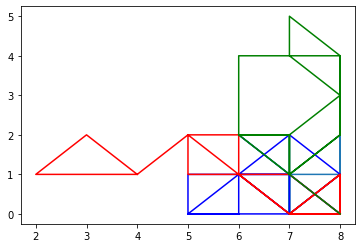

In [13]:
import matplotlib.pyplot as plt

end[0]=start[0]
end[1]=start[1]
print("start:",start)
path_list1 = []
path_list1.append(end)
matrix1 = np.zeros((size,size))
matrix1[end[0], end[1]] = 1
for i in range (int(length)):
  add_move =moves[unzipped_list[0][-1][i+1]-1]
  end = [end[0] + add_move[0], end[1] + add_move[1]]
  matrix1[end[0], end[1]] = 1
  path_list1.append(end)
print("end",end)
area1 = len(np.argwhere(matrix1 == 1))
print(area1)
data = np.array(path_list1)
plt.plot(data[:, 0], data[:, 1])


end[0]=start[0]
end[1]=start[1]
print("start:",start)
path_list2 = []
path_list2.append(end)
matrix2 = np.zeros((size,size))
for i in range (int(length)):
  add_move =moves[unzipped_list[1][-1][i+1]-1]
  end = [end[0] + add_move[0], end[1] + add_move[1]]
  matrix2[end[0], end[1]] = 1
  path_list2.append(end)
print("end",end)
area2 = len(np.argwhere(matrix2 == 1))
print(area2)

data = np.array(path_list2)
plt.plot(data[:, 0], data[:, 1],c='b')

end[0]=start[0]
end[1]=start[1]
print("start:",start)
path_list3 = []
path_list3.append(end)
matrix3 = np.zeros((size,size))
matrix3[end[0], end[1]] = 1
for i in range (int(length)):
  add_move =moves[unzipped_list[2][-1][i+1]-1]
  end = [end[0] + add_move[0], end[1] + add_move[1]]
  matrix3[end[0], end[1]] = 1
  path_list3.append(end)
print("end",end)
area3 = len(np.argwhere(matrix3 == 1))
print(area3)
data = np.array(path_list3)
plt.plot(data[:, 0], data[:, 1],c='r')


end[0]=start[0]
end[1]=start[1]
print("start:",start)
path_list4 = []
path_list4.append(end)
matrix4 = np.zeros((size,size))
for i in range (int(length)):
  add_move =moves[unzipped_list[3][-1][i+1]-1]
  end = [end[0] + add_move[0], end[1] + add_move[1]]
  matrix4[end[0], end[1]] = 1
  path_list4.append(end)
print("end",end)
area4 = len(np.argwhere(matrix4 == 1))
print(area4)
all_mat = matrix1 + matrix2 + matrix3 + matrix4
sum_of_area = len(np.argwhere(all_mat != 0))
print("ortak alan:",sum_of_area)

data = np.array(path_list4)
plt.plot(data[:, 0], data[:, 1],c='g')
plt.show()
